In [ ]:
# https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [168]:
import numpy as np
import pandas as pd

In [169]:
df = pd.read_csv("heart.csv")

In [170]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [171]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [172]:
df.shape

(1025, 14)

In [173]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [174]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [175]:
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

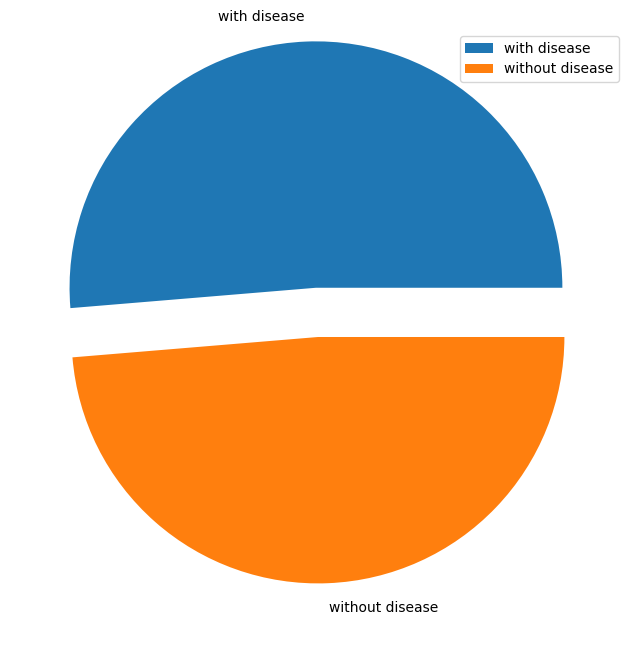

In [177]:
label =["with disease", "without disease"]
myexplode = [0.2, 0]
plt.figure(figsize=(8,8))
plt.pie(df["target"].value_counts(),labels=label, explode = myexplode)
plt.legend()

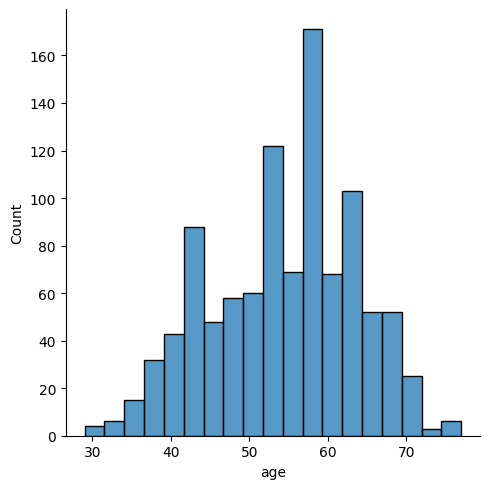

In [178]:
sns.displot(df.age)

<Axes: >

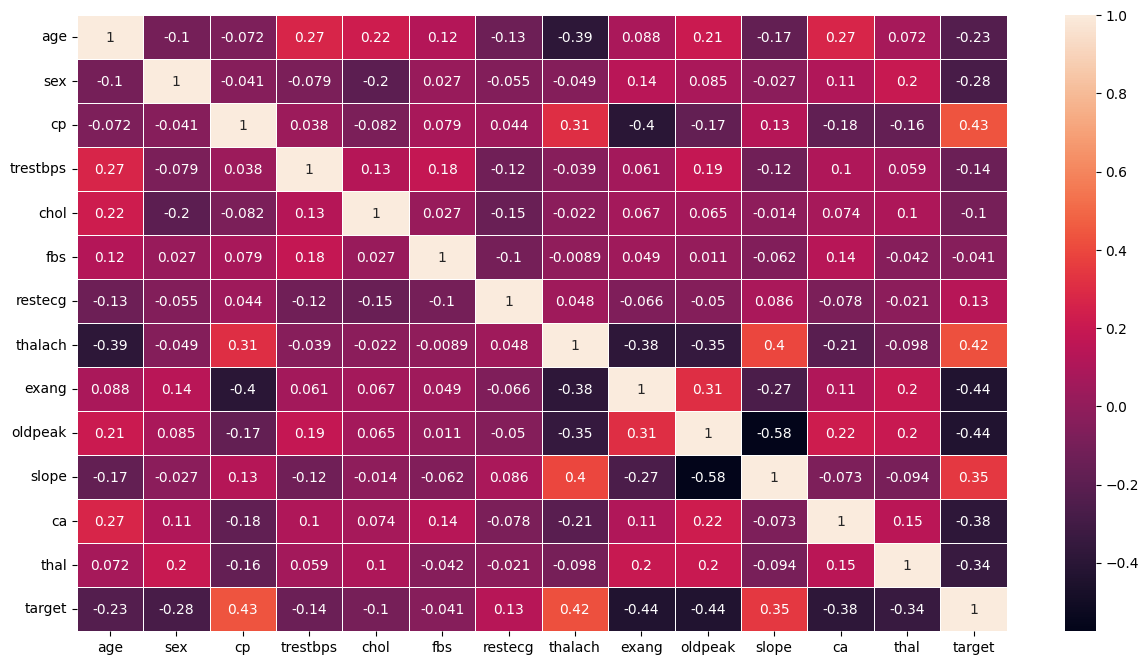

In [179]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linewidths=.5)

In [180]:
df.iloc[:,-1]

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [181]:
from imblearn.combine import SMOTETomek
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [182]:
smo_tek = SMOTETomek()
X_smotek, y_smotek = smo_tek.fit_resample(X, Y)

In [183]:
from collections import Counter
Counter(Y)
Counter(y_smotek)

Counter({0: 526, 1: 526})

In [184]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_smotek, y_smotek, test_size=0.25, random_state=33)

In [185]:
X_train.shape

(789, 13)

In [186]:
y_train

596     1
66      1
289     0
901     1
72      0
       ..
57      1
658     0
578     1
391     0
1044    0
Name: target, Length: 789, dtype: int64

In [187]:
X_train.nunique()

age          41
sex           2
cp            4
trestbps     53
chol        152
fbs           2
restecg       3
thalach      92
exang         2
oldpeak      47
slope         3
ca            5
thal          4
dtype: int64

In [188]:
a = X_train.ca .unique()
pd.Series(a).sort_values()

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pred_knn = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.8631178707224335
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       121
           1       0.84      0.92      0.88       142

    accuracy                           0.86       263
   macro avg       0.87      0.86      0.86       263
weighted avg       0.87      0.86      0.86       263



c:\Users\_jonah\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [190]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.8631178707224335
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       121
           1       0.87      0.87      0.87       142

    accuracy                           0.86       263
   macro avg       0.86      0.86      0.86       263
weighted avg       0.86      0.86      0.86       263



In [191]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.8631178707224335
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       121
           1       0.83      0.94      0.88       142

    accuracy                           0.86       263
   macro avg       0.87      0.86      0.86       263
weighted avg       0.87      0.86      0.86       263



In [192]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))


Accuracy: 0.9315589353612167
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       121
           1       0.92      0.95      0.94       142

    accuracy                           0.93       263
   macro avg       0.93      0.93      0.93       263
weighted avg       0.93      0.93      0.93       263



In [193]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Accuracy: 0.8326996197718631
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       121
           1       0.81      0.89      0.85       142

    accuracy                           0.83       263
   macro avg       0.84      0.83      0.83       263
weighted avg       0.84      0.83      0.83       263



In [203]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
596,59,1,1,140,221,0,1,164,1,0.000000,2,0,2
66,53,1,2,130,197,1,0,152,0,1.200000,0,0,2
289,40,1,0,152,223,0,1,181,0,0.000000,2,0,3
901,42,0,0,102,265,0,0,122,0,0.600000,1,0,2
72,56,1,0,125,249,1,0,144,1,1.200000,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,48,1,1,130,245,0,0,180,0,0.200000,1,0,2
658,64,1,2,125,309,0,1,131,1,1.800000,1,0,3
578,62,0,0,140,394,0,0,157,0,1.200000,1,0,2
391,45,1,3,110,264,0,1,132,0,1.200000,1,0,3


In [194]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Accuracy: 0.8935361216730038
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       121
           1       0.87      0.94      0.91       142

    accuracy                           0.89       263
   macro avg       0.90      0.89      0.89       263
weighted avg       0.90      0.89      0.89       263



In [195]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Accuracy: 0.9391634980988594
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       121
           1       0.94      0.95      0.94       142

    accuracy                           0.94       263
   macro avg       0.94      0.94      0.94       263
weighted avg       0.94      0.94      0.94       263



In [198]:
import pickle
pickle.dump(forest, open('model.pkl', 'wb'))

In [197]:
def load_model():
    with open("model.pkl", "rb") as file:
        return pickle.load(file)

model = load_model()
print(type(model))


<class 'numpy.ndarray'>
